In [11]:
import warnings
warnings.simplefilter("ignore")
import mlrose_hiive as mlrose
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
from param_search import *
#import utils

In [ ]:
fitness = mlrose.FourPeaks(t_pct=0.1)
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)
output_dir = r"C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks"

rhc = mlrose.RHCRunner(problem=problem,
                       experiment_name="RHC",
                       output_directory=output_dir,
                       seed=42,
                       iteration_list=2 ** np.arange(15),
                       max_attempts=1000,
                       restart_list=[10])
rhc_run_stats, rhc_run_curves = rhc.run()

sa = mlrose.SARunner(problem=problem,
                     experiment_name="SA",
                     output_directory=output_dir,
                     seed=42,
                     iteration_list=2 ** np.arange(20),
                     max_attempts=1000,
                     temperature_list=[100, 250, 500],
                     decay_list=[mlrose.ExpDecay, mlrose.GeomDecay])
sa_run_stats, sa_run_curves = sa.run()

ga = mlrose.GARunner(problem=problem,
                     experiment_name="GA",
                     output_directory=output_dir,
                     seed=42,
                     iteration_list=2 ** np.arange(13),
                     max_attempts=1000,
                     population_sizes=[100, 200, 300],
                     mutation_rates=[0.1, 0.2, 0.3])
ga_run_stats, ga_run_curves = ga.run()

mimic = mlrose.MIMICRunner(problem=problem,
                           experiment_name="MIMIC",
                           output_directory=output_dir,
                           seed=42,
                           iteration_list=2 ** np.arange(13),
                           population_sizes=[100, 200, 300],
                           max_attempts=500,
                           keep_percent_list=[0.1, 0.2, 0.3],
                           use_fast_mimic=True)
mimic_run_stats, mimic_run_curves = mimic.run()

In [312]:
rhc_run_curves = pd.read_csv(r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\RHC\rhc__RHC__curves_df.csv')
rhc_run_stats = pd.read_csv(r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\RHC\rhc__RHC__run_stats_df.csv')

sa_run_curves = pd.read_csv(r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\SA\sa__SA__curves_df.csv')
sa_run_stats = pd.read_csv(r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\SA\sa__SA__run_stats_df.csv')

ga_run_curves = pd.read_csv(r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\GA\ga__GA__curves_df.csv')
ga_run_stats = pd.read_csv(r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\GA\ga__GA__run_stats_df.csv')

mimic_run_curves = pd.read_csv(r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\MIMIC\mimic__MIMIC__curves_df.csv')
mimic_run_stats = pd.read_csv(r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\MIMIC\mimic__MIMIC__run_stats_df.csv')

In [316]:
def ga_param_search(runs_ga, prob_name):
    
    pop = [100, 200, 300]
    mut = [0.1, 0.2, 0.3]
    
    combinations = [(p, m) for p in pop for m in mut]
    color = {100: 'r', 200:'b', 300:'g'}
    marker = {0.1: 'o', 0.2:'+', 0.3:'x'}
    
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    #fig.figure(figsize=(10,10))
    for p,m in combinations:
        runs = runs_ga[(runs_ga['Population Size'] == p) & (runs_ga['Mutation Rate'] == m) & (runs_ga['Iteration'] <= 3000)]
        
        ax[0].plot(runs['Iteration'], runs['Fitness'], c=color[p], marker=marker[m], ls='--',label='Population Size='+str(p)+' Mutation Rate='+str(m))
        #ax[0].legend()
        ax[0].set_xlabel('Iteration')
        ax[0].set_ylabel('Fitness')
        ax[0].set_title('GA-'+prob_name+'-Fitness')
        ax[0].grid()
        ax[0].legend()
    
    for p,m in combinations:
        runs = runs_ga[(runs_ga['Population Size'] == p) & (runs_ga['Mutation Rate'] == m)  & (runs_ga['Iteration'] <= 5000)]
        
        ax[1].plot(runs['Iteration'], runs['Time'],  c=color[p], marker=marker[m], ls='--', label='Population Size='+str(p)+' Mutation Rate='+str(m))
        ax[1].set_xlabel('Iteration')
        ax[1].set_ylabel('Time')
        ax[1].set_title('GA-'+prob_name+'-Time')
        ax[1].grid()
        #ax[1].legend()
    plt.show()
    plt.close()

def sa_param_search(runs, prob_name):

    temp = [100, 250, 500]
    decay = ["exponential", "geometric"]
    
    combinations = [(t, d) for t in temp for d in decay]
    color = {100: 'r', 250:'b', 500:'g'}
    marker = {"exponential": 'o', "geometric":'+'}
    
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    #fig.figure(figsize=(10,10))
    for t,d in combinations:
        run = runs[(runs['Temperature'] == t) & (runs['schedule_type'] == d) & (runs['Iteration'] <= 10000)]
        #print(run[['Temperature', 'schedule_type']].head())
        ax[0].plot(run['Iteration'], run['Fitness'], c=color[t], marker=marker[d], ls='--', 
                   label='Temperature='+str(t)+' Decay='+str(d))
        #ax[0].legend()
        ax[0].set_xlabel('Iteration')
        ax[0].set_ylabel('Fitness')
        ax[0].set_title('SA-'+prob_name+'-Fitness')
        ax[0].grid()
        ax[0].legend()
    
    for t,d in combinations:
        run = runs[(runs['Temperature'] == t) & (runs['schedule_type'] == d)  & (runs['Iteration'] <= 5000)]
    
        ax[1].plot(run['Iteration'], run['Time'],  c=color[t], marker=marker[d], ls='--', 
                   label='Temperature='+str(t)+' Decay='+str(d))
        ax[1].set_xlabel('Iteration')
        ax[1].set_ylabel('Time')
        ax[1].set_title('SA-'+prob_name+'-Time')
        ax[1].grid()
        #ax[1].legend()
    plt.show()
    plt.close()

def rhc_param_search(rhc_curves_runs, rhc_runs_stats, prob_name):
    restarts = np.arange(1,11)
    
    #color = {0: 'r', 10:'b', 50:'g'}
    markers = {0:'o', 1:'^', 2:'s', 3:'+', 4:'*', 5:'x', 6:'p', 7:'h', 8:'<', 9:'>', 10:''}
    #markers = {i:'$'+str(i)+'$' for i in restarts}
    #print(markers)
    
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    for t in restarts:
        run = rhc_curves_runs[(rhc_curves_runs['current_restart'] == t) ] #& (rhc_curves_runs['Iteration'] <=10000)
        run = run.iloc[::300, :]
        ax[0].plot(run['Iteration']-run.iloc[0]['Iteration'], run['Fitness'], ls='--', marker=markers[t],
                   label='Restart='+str(t))
        #ax[0].plot(run['Iteration'], run['Fitness'], ls='--',  marker=markers[t],
        #           label='Restart='+str(t))
        ax[0].set_xlabel('Iteration')
        ax[0].set_ylabel('Fitness')
        ax[0].set_title('RHC-'+prob_name+'-Fitness')
        ax[0].grid()
        ax[0].legend()
        
    for t in restarts:
        run = rhc_runs_stats[(rhc_runs_stats['current_restart'] == t)]
    
        #ax[1].plot(run['Iteration']-run.iloc[0]['Iteration'], run['Time']-run.iloc[0]['Time'],  ls='--', 
        #           label='Restart='+str(t))
        ax[1].plot(run['Iteration'], run['Time']-run.iloc[0]['Time'],  ls='--',  marker=markers[t],
               label='Restart='+str(t))
    
        ax[1].set_xlabel('Iteration')
        ax[1].set_ylabel('Time')
        ax[1].set_title('RHC-'+prob_name+'-Time')
        ax[1].grid()
        ax[1].legend()
    plt.show()
    plt.close()

def mimic_param_search(runs, prob_name):
    keep_pct = [0.1, 0.2, 0.3]
    population_sizes=[100, 200, 300]
    combinations = [(t, p) for t in keep_pct for p in population_sizes]
    
    color = {0.1: 'r', 0.2:'b', 0.3:'g'}
    marker = {100: '^', 200:'x', 300:'+'}
    
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    #fig.figure(figsize=(10,10))
    for t, p in combinations:
        run = runs[(runs['Keep Percent'] == t) & (runs['Population Size'] == p) &  (runs['Iteration'] <= 1000)]
        ax[0].plot(run['Iteration'], run['Fitness'], 
                   c=color[t], marker=marker[p],
                   ls='--', 
                   label='Keep Pct='+str(t)+' Population Size='+str(p))
        #ax[0].legend()
        ax[0].set_xlabel('Iteration')
        ax[0].set_ylabel('Fitness')
        ax[0].set_title('MIMIC-'+prob_name+'-Fitness')
        ax[0].grid()
        ax[0].legend()
    
    for t, p in combinations:
        run = runs[(runs['Keep Percent'] == t) & (runs['Population Size'] == p) &  (runs['Iteration'] <= 2000)]
    
        ax[1].plot(run['Iteration'], run['Time'],  
                   c=color[t], marker=marker[p],
                   ls='--', 
                   label='Keep Pct='+str(t)+' Population Size='+str(p))
        ax[1].set_xlabel('Iteration')
        ax[1].set_ylabel('Time')
        ax[1].set_title('MIMIC-'+prob_name+'-Time')
        ax[1].grid()
        ax[1].legend()
    plt.show()
    plt.close()



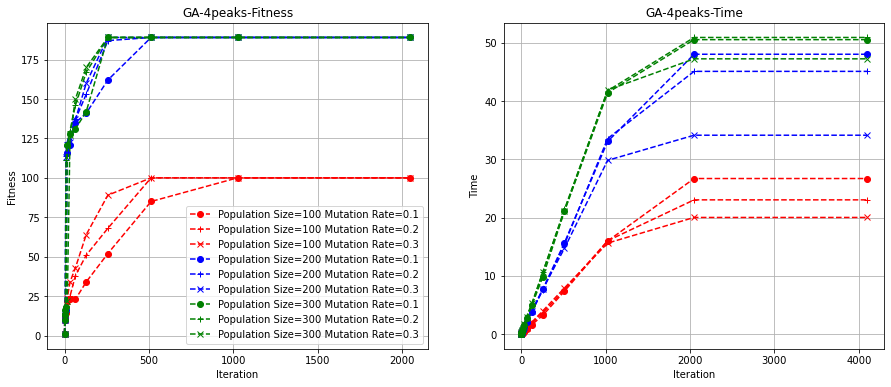

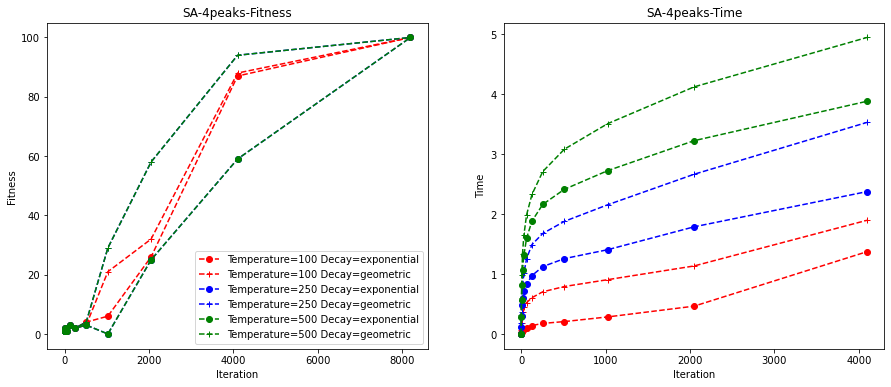

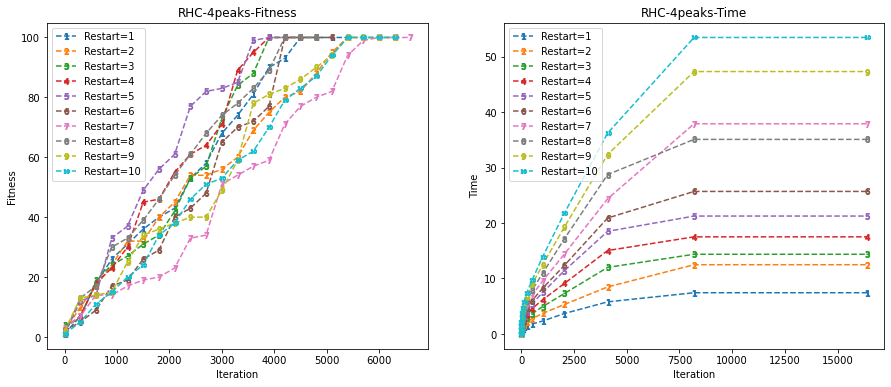

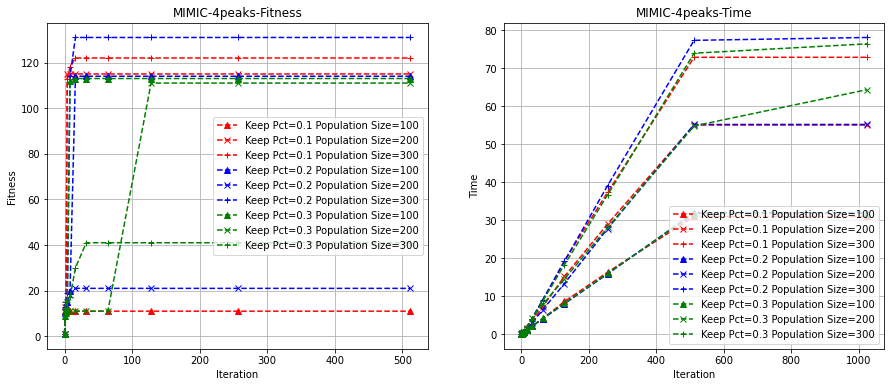

In [315]:
prob_name = '4peaks'

ga_param_search(ga_run_stats, prob_name)
sa_param_search(sa_run_stats, prob_name)
rhc_param_search(rhc_run_curves, rhc_run_stats, prob_name)
mimic_param_search(mimic_run_stats, prob_name)

In [329]:
fitness = mlrose.FourPeaks(t_pct=0.1)

lengths_experiment = [2**x for x in range(10)]

In [321]:
for length in lengths_experiment:
    problem = mlrose.DiscreteOpt(length=length, fitness_fn=fitness, maximize=True, max_val=2)
    output_dir = r"C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks_GA_length\\" + str(length)
    ga = mlrose.GARunner(problem=problem,
                         experiment_name="GA",
                         output_directory=output_dir,
                         seed=42,
                         iteration_list=2 ** np.arange(13),
                         max_attempts=1000,
                         population_sizes=[300],
                         mutation_rates=[0.3])
    ga_run_stats, ga_run_curves = ga.run()

Running ga
*****************
*** Run START ***
*****************
pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[0], iteration:[0], done:[False], time:[0.02], fitness:[1.0000]
	[0]...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[2], iteration:[1], done:[False], time:[0.05], fitness:[1.0000]
	[0]...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[3], iteration:[2], done:[False], time:[0.10], fitness:[1.0000]
	[0]...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[5], iteration:[4], done:[False], time:[0.15], fitness:[1.0000]
	[0]...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[9], iteration:[8], done:[False], time:[0.26], fitness:[1.0000]
	[0]...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[8], iteration:[8], done:[False], time:[0.23], fitness:[14.0000]
	[1 1 1 1 1 1 0 0]...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[16], iteration:[16], done:[False], time:[0.43], fitness:[14.0000]
	[1 1 1 1 1 1 0 0]...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[32], iteration:[32], done:[False], time:[0.87], fitness:[14.0000]
	[1 1 1 1 1 1 0 0]...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[64], iteration:[64], done:[False], time:[1.69], fitness:[14.0000]
	[1 1 1 1 1 1 0 0]...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[128], iteration:[128], done:[False], time:[3.27], fitness:[14.0000]
	[1 1 1 1 1 1 0 0]...

pop_size:[300], mutation_prob:[0.3], max

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[1], iteration:[4], done:[False], time:[0.18], fitness:[15.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0// 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[1], iteration:[8], done:[False], time:[0.38], fitness:[77.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0// 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0]...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[8], iteration:[16], done:[False], time:[0.77], fitness:[80.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1// 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0]...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[3], iteration:[4], done:[False], time:[0.21], fitness:[14.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0// 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1// 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[3], iteration:[8], done:[False], time:[0.38], fitness:[17.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0// 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1// 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[1], iteration:[16], done:[False], time:[0.74], fitness:[26.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1// 0 1 0 0 

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[8], iteration:[1024], done:[False], time:[112.01], fitness:[238.0000]
	[1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0// 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0// 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[1], iteration:[2048], done:[False], time:[285.37], fitness:[392.0000]
	[1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0// 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0// 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1...

pop_size:[300], mutation_prob:[0.3], max_iters:[4096]
runner_name:[ga], experiment_name:[GA], attempt:[1001], iteration:[3900], done:[True], time:[629.48], fitness:[512.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
for length in lengths_experiment:
    problem = mlrose.DiscreteOpt(length=length, fitness_fn=fitness, maximize=True, max_val=2)
    output_dir = r"C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks_SA_length\\" + str(length)
    sa = mlrose.SARunner(problem=problem,
                     experiment_name="SA",
                     output_directory=output_dir,
                     seed=42,
                     iteration_list=2 ** np.arange(20),
                     max_attempts=1000,
                     temperature_list=[250],
                     decay_list=[mlrose.GeomDecay])
    sa_run_stats, sa_run_curves = sa.run()

for length in lengths_experiment:
    problem = mlrose.DiscreteOpt(length=length, fitness_fn=fitness, maximize=True, max_val=2)
    output_dir = r"C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks_RHC_length\\" + str(length)
    

No handles with labels found to put in legend.


Text(0, 0.5, 'Iterations Required to Optimize')

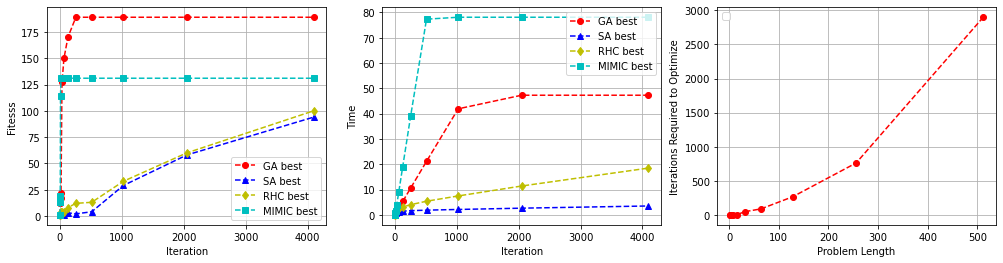

In [336]:
#best for 4peaks
#GA - Pop 300 
import os
ga_best = runs_ga[(runs_ga['Population Size'] == 300) & (runs_ga['Mutation Rate'] == 0.3) ] #& (runs_ga['Iteration'] <= 4096)
sa_best = runs_sa[(runs_sa['Temperature'] == 250) & (runs['schedule_type'] == 'geometric') & (runs_sa['Iteration'] <= 4096) ]
rhc_best = runs_rhc[(runs_rhc['current_restart'] == 5) & (runs_rhc['Iteration'] <= 4096) ]
mimic_best = runs_mimic[(runs_mimic['Keep Percent'] == 0.2) & (runs_mimic['Population Size'] == 300) & (runs_mimic['Iteration'] <= 4096)]

fig, ax =  plt.subplots(1,3, figsize=(17,4))

ax[0].plot(ga_best['Iteration'], ga_best['Fitness'], 'ro--', label='GA best')
ax[0].plot(sa_best['Iteration'], sa_best['Fitness'], 'b^--', label='SA best')
ax[0].plot(rhc_best['Iteration'], rhc_best['Fitness'], 'yd--', label='RHC best')
ax[0].plot(mimic_best['Iteration'], mimic_best['Fitness'], 'cs--', label='MIMIC best')
ax[0].legend()
ax[0].grid()
#ax[0].set_xscale('log')

ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Fitesss')

ax[1].plot(ga_best['Iteration'], ga_best['Time'], 'ro--', label='GA best')
ax[1].plot(sa_best['Iteration'], sa_best['Time'], 'b^--', label='SA best')
ax[1].plot(rhc_best['Iteration'], rhc_best['Time']-rhc_best.iloc[0]['Time'], 'yd--', label='RHC best')
ax[1].plot(mimic_best['Iteration'], mimic_best['Time'], 'cs--', label='MIMIC best')
ax[1].legend()
#ax[0].set_xscale('log')
ax[1].grid()

ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Time')


max_iteartions_needed = []
for length in [2**x for x in range(10)]:
    
    problem = mlrose.DiscreteOpt(length=length, fitness_fn=fitness, maximize=True, max_val=2)
    output_dir = r"C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks_GA_length\\" + str(length)
    ga_run_stats = pd.read_csv(os.path.join(output_dir, 'GA', 'ga__GA__curves_df.csv'))
    max_iteartions_needed.append(ga_run_stats.iloc[ga_run_stats['Fitness'].idxmax()]['Iteration'])
    
ax[2].plot([2**x for x in range(10)], max_iteartions_needed, 'ro--')

ax[2].grid()
ax[2].legend()
ax[2].set_xlabel('Problem Length')
ax[2].set_ylabel('Iterations Required to Optimize')



In [13]:
this_dir = r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization'
#===================================================================================================
# STEP1: DEFINE A FITNESS FUNCTION, PROBLEM, AND OUTPUT DIRECTORY
#===================================================================================================
fitness = mlrose.OneMax()
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)
problem_name = '1max'
output_dir = os.path.join(this_dir, problem_name)   #r"C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks"

#===================================================================================================
# STEP2: RUN OPTIMIZATIONS FOR A RANGE OF HYPERPARAMETERS FOR RHC, SA, GA, AND MIMIC
#===================================================================================================
#param_search.run_param_search(problem, output_dir)

#===================================================================================================
# STEP3: READ IN THE DATA REGARDING THE RAN OPTIMIZATION  
#===================================================================================================
rhc_run_curves = pd.read_csv(os.path.join(output_dir, 'RHC', 'rhc__RHC__curves_df.csv'))#r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\RHC\rhc__RHC__curves_df.csv')
rhc_run_stats = pd.read_csv(os.path.join(output_dir, 'RHC', 'rhc__RHC__run_stats_df.csv'))#r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\RHC\rhc__RHC__run_stats_df.csv')

sa_run_curves = pd.read_csv(os.path.join(output_dir, 'SA', 'sa__SA__curves_df.csv'))#r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\SA\sa__SA__curves_df.csv')
sa_run_stats = pd.read_csv(os.path.join(output_dir, 'SA', 'sa__SA__run_stats_df.csv'))#r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\SA\sa__SA__run_stats_df.csv')

ga_run_curves = pd.read_csv(os.path.join(output_dir, 'GA', 'ga__GA__curves_df.csv'))#r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\GA\ga__GA__curves_df.csv')
ga_run_stats = pd.read_csv(os.path.join(output_dir, 'GA', 'ga__GA__run_stats_df.csv'))#r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\GA\ga__GA__run_stats_df.csv')

mimic_run_curves = pd.read_csv(os.path.join(output_dir, 'MIMIC', 'mimic__MIMIC__curves_df.csv'))#pd.read_csv(r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\MIMIC\mimic__MIMIC__curves_df.csv')
mimic_run_stats = pd.read_csv(os.path.join(output_dir, 'MIMIC', 'mimic__MIMIC__run_stats_df.csv'))#r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization\4peaks\MIMIC\mimic__MIMIC__run_stats_df.csv')


AttributeError: module 'param_search' has no attribute 'run_param_search'

# Neural Network Optimization

In [163]:
from sklearn.model_selection import train_test_split
import mlrose_hiive as mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics.classification import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import pickle

this_dir =  r'C:\Users\AREHAN2\Documents\omscs\CS7641\randomized_optimization'
os.makedirs(os.path.join(this_dir, 'nn_opt'))

def get_dataset(verbose=True):
    df = pd.read_csv(os.path.join(this_dir,  "data", "diabetes.csv"))
    y = df['Outcome']
    X = df.drop(columns='Outcome')        
    return X, y

def tune_hyperparameter(param_grid, pipe, X_train, y_train):
    cv = StratifiedKFold(n_splits=5, random_state=42)
    tuned_model = GridSearchCV(pipe, param_grid, cv=cv, n_jobs=-1, scoring='f1', return_train_score=True)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
        tuned_model.fit(X_train, y_train)
    print("Tuned params: {}".format(tuned_model.best_params_))
    
    ypred = tuned_model.predict(X_train)
    print('refit train metrics=\n', classification_report(y_train, ypred))
    return tuned_model


X2, y2 = get_dataset(verbose=False)

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

#transform data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
hidden_layers = [12,6,4,2]
models = {}


In [174]:
algos = {
        'SA': { 'algorithm': ['simulated_annealing'],
                'schedule': [mlrose.GeomDecay(init_temp=1, decay=0.99),
                          mlrose.GeomDecay(init_temp=100, decay=0.99),
                          mlrose.GeomDecay(init_temp=1000, decay=0.99),
                          mlrose.ExpDecay(init_temp=1, exp_const=0.05), 
                          mlrose.ExpDecay(init_temp=100, exp_const=0.05), 
                          mlrose.ExpDecay(init_temp=1000, exp_const=0.05), 
                          ],
                    'max_iters' : [2000],
                  'learning_rate': [0.1, 1, 10]
              },
            'GA': {'algorithm':[ 'genetic_alg'],
                    'pop_size' : [100, 500],
                     'mutation_prob': [0.3, 0.5],
                    'max_iters' : [3000],
                  'learning_rate': [0.1, 1]
                  },
            'RHC': {'algorithm': ['random_hill_climb'],
                    'restarts': [10],
                    'max_iters' : [4000],
                  'learning_rate': [0.01, 0.1, 1]
                   },
            'GD': {'algorithm': ['gradient_descent'],
                    'max_iters' : [2**13],
                  'learning_rate':[0.01]
                  }
        }


In [149]:
algorithms = ['RHC', 'SA', 'GA']


for algo in algorithms:
    classifier =  mlrose.NeuralNetwork(hidden_nodes=hidden_layers, activation='tanh', 
              bias=True, is_classifier=True, early_stopping=True, 
              clip_max=1000000000.0, max_attempts=100, random_state=42, curve=True)

    
    models[algo] = tune_hyperparameter(algos[algo],
                                       classifier, X_train, y_train)
    
    print("train f1 score", models[algo].score(X_train, y_train))
    print("test f1 score", models[algo].score(X_test, y_test))

Tuned params: {'algorithm': 'random_hill_climb', 'learning_rate': 0.01, 'max_iters': 16384, 'restarts': 1}
refit train metrics=
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       349
           1       0.78      0.70      0.74       188

    accuracy                           0.82       537
   macro avg       0.81      0.80      0.80       537
weighted avg       0.82      0.82      0.82       537

train f1 score 0.7374301675977653
test f1 score 0.6296296296296297
Tuned params: {'algorithm': 'simulated_annealing', 'learning_rate': 0.01, 'max_iters': 16384, 'schedule': ExpDecay(init_temp=10, exp_const=0.05, min_temp=0.001)}
refit train metrics=
               precision    recall  f1-score   support

           0       0.72      0.58      0.64       349
           1       0.42      0.57      0.49       188

    accuracy                           0.58       537
   macro avg       0.57      0.58      0.56       537
weighted avg       0.

In [162]:
algo = 'SA'
classifier =  mlrose.NeuralNetwork(hidden_nodes=hidden_layers, activation='tanh', 
          bias=True, is_classifier=True, early_stopping=True, 
          clip_max=10.0, max_attempts=100, random_state=42, curve=True)


models[algo] = tune_hyperparameter(algos[algo],
                                   classifier, X_train, y_train)
models[algo]
print("train f1 score", models[algo].score(X_train, y_train))
print("test f1 score", models[algo].score(X_test, y_test))

Tuned params: {'algorithm': 'simulated_annealing', 'learning_rate': 1, 'max_iters': 2000, 'schedule': ExpDecay(init_temp=1, exp_const=0.05, min_temp=0.001)}
refit train metrics=
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       349
           1       0.82      0.68      0.74       188

    accuracy                           0.84       537
   macro avg       0.83      0.80      0.81       537
weighted avg       0.83      0.84      0.83       537

train f1 score 0.7441860465116279
test f1 score 0.6037735849056604


In [172]:
print(models)
print(algo)
with open(os.path.join(this_dir, 'nn_opt', algo+'_nn.pkl'), 'wb') as f: 
    pickle.dump(models[algo], f)

{'GA': GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
             estimator=NeuralNetwork(activation='tanh', clip_max=10.0,
                                     curve=True, early_stopping=True,
                                     hidden_nodes=[12, 6, 4, 2],
                                     max_attempts=100, random_state=42),
             n_jobs=-1,
             param_grid={'algorithm': ['genetic_alg'],
                         'learning_rate': [0.1, 1], 'max_iters': [3000],
                         'mutation_prob': [0.3, 0.5], 'pop_size': [100, 500]},
             return_train_score=True, scoring='f1')}
GA


In [171]:
algo = 'GA'
classifier =  mlrose.NeuralNetwork(hidden_nodes=hidden_layers, activation='tanh', 
          bias=True, is_classifier=True, early_stopping=True, 
          clip_max=10.0, max_attempts=100, random_state=42, curve=True)


models[algo] = tune_hyperparameter(algos[algo],
                                   classifier, X_train, y_train)

print("train f1 score", models[algo].score(X_train, y_train))
print("test f1 score", models[algo].score(X_test, y_test))

Tuned params: {'algorithm': 'genetic_alg', 'learning_rate': 0.1, 'max_iters': 3000, 'mutation_prob': 0.3, 'pop_size': 100}
refit train metrics=
               precision    recall  f1-score   support

           0       0.75      0.82      0.79       349
           1       0.60      0.50      0.55       188

    accuracy                           0.71       537
   macro avg       0.68      0.66      0.67       537
weighted avg       0.70      0.71      0.70       537

train f1 score 0.5465116279069767
test f1 score 0.5131578947368421


In [175]:
algo = 'RHC'
classifier =  mlrose.NeuralNetwork(hidden_nodes=hidden_layers, activation='tanh', 
          bias=True, is_classifier=True, early_stopping=True, 
          clip_max=10.0, max_attempts=100, random_state=42, curve=True)


models[algo] = tune_hyperparameter(algos[algo],
                                   classifier, X_train, y_train)

print("train f1 score", models[algo].score(X_train, y_train))
print("test f1 score", models[algo].score(X_test, y_test))

Tuned params: {'algorithm': 'random_hill_climb', 'learning_rate': 1, 'max_iters': 4000, 'restarts': 10}
refit train metrics=
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       349
           1       0.77      0.74      0.76       188

    accuracy                           0.83       537
   macro avg       0.82      0.81      0.81       537
weighted avg       0.83      0.83      0.83       537

train f1 score 0.7554347826086958
test f1 score 0.5806451612903225


In [154]:
algo = 'GD'
classifier =  mlrose.NeuralNetwork(hidden_nodes=hidden_layers, activation='tanh', 
          bias=True, is_classifier=True, early_stopping=True, 
          clip_max=10.0, max_attempts=100, random_state=42, curve=True)


models[algo] = tune_hyperparameter(algos[algo],
                                   classifier, X_train, y_train)

print("train f1 score", models[algo].score(X_train, y_train))
print("test f1 score", models[algo].score(X_test, y_test))

Tuned params: {'algorithm': 'gradient_descent', 'learning_rate': 0.01, 'max_iters': 8192}
refit train metrics=
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       349
           1       0.81      0.71      0.75       188

    accuracy                           0.84       537
   macro avg       0.83      0.81      0.82       537
weighted avg       0.84      0.84      0.84       537

train f1 score 0.7535410764872521
test f1 score 0.6666666666666666


MODEL NAME:  GD 
Final loss value:  0.3965727993690006
Length of Iteration 8192
Refit Time:  24.84298610687256
train f1 score 0.7535410764872521
test f1 score 0.6666666666666666


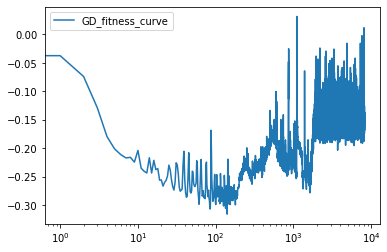

In [156]:
for model in models:
    print("MODEL NAME: ", model, "\n==========")
    print("Final loss value: ", models[model].best_estimator_.loss)
    loss = models[model].best_estimator_.fitness_curve
    if model == 'GD':
        loss = loss * -1
    print("Length of Iteration", len(loss))
    print("Refit Time: ", models[model].refit_time_)
    df = pd.DataFrame(models[model].cv_results_)
    #print(df.info())
    #print(df)
    print("train f1 score", models[model].score(X_train, y_train))
    print("test f1 score", models[model].score(X_test, y_test))
    plt.plot(loss - loss[0], label=model+'_fitness_curve')
    plt.xscale('log')
    
plt.legend()
plt.show()
    